In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [67]:
df = pd.read_csv('Dataset-weather-prediction-dataset-processed.csv')

In [68]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0             0.7              6.5             0.8   
1                 0             1.1              6.1             3.3   
2                 0             0.0              8.5             5.1   
3                 0             4.1              6.3             3.8   
4                 0             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0                   7                7.7             0.85           1.0032   
1                   8           

In [69]:
df.shape

(22950, 170)

In [70]:
df.dtypes

DATE                             int64
MONTH                            int64
BASEL_cloud_cover                int64
BASEL_wind_speed               float64
BASEL_humidity                 float64
BASEL_pressure                 float64
BASEL_global_radiation         float64
BASEL_precipitation            float64
BASEL_snow_depth                 int64
BASEL_sunshine                 float64
BASEL_temp_mean                float64
BASEL_temp_min                 float64
BASEL_temp_max                 float64
BELGRADE_cloud_cover             int64
BELGRADE_humidity              float64
BELGRADE_pressure              float64
BELGRADE_global_radiation      float64
BELGRADE_precipitation         float64
BELGRADE_sunshine              float64
BELGRADE_temp_mean             float64
BELGRADE_temp_min              float64
BELGRADE_temp_max              float64
BUDAPEST_cloud_cover             int64
BUDAPEST_humidity              float64
BUDAPEST_pressure              float64
BUDAPEST_global_radiation

In [71]:
df['DATE'] = df['DATE'].astype('object')

In [72]:
df.isnull().sum()

DATE                           0
MONTH                          0
BASEL_cloud_cover              0
BASEL_wind_speed               0
BASEL_humidity                 0
BASEL_pressure                 0
BASEL_global_radiation         0
BASEL_precipitation            0
BASEL_snow_depth               0
BASEL_sunshine                 0
BASEL_temp_mean                0
BASEL_temp_min                 0
BASEL_temp_max                 0
BELGRADE_cloud_cover           0
BELGRADE_humidity              0
BELGRADE_pressure              0
BELGRADE_global_radiation      0
BELGRADE_precipitation         0
BELGRADE_sunshine              0
BELGRADE_temp_mean             0
BELGRADE_temp_min              0
BELGRADE_temp_max              0
BUDAPEST_cloud_cover           0
BUDAPEST_humidity              0
BUDAPEST_pressure              0
BUDAPEST_global_radiation      0
BUDAPEST_precipitation         0
BUDAPEST_sunshine              0
BUDAPEST_temp_mean             0
BUDAPEST_temp_min              0
BUDAPEST_t

In [73]:
desc = df.describe()

In [74]:
# Create a function to highlight the first column
def highlight_first_col(s):
    is_first_col = s.index == 'count'
    return ['background-color: lightblue' if v else '' for v in is_first_col]

In [75]:
# Apply the style with the highlighted first column
styled_desc = desc.style.apply(highlight_first_col, axis=1)

# Set the first column as sticky
styled_desc.set_sticky(axis="index")

# Display the styled DataFrame
styled_desc



I can see that not all the cities have the same parameters, therefore I will do following:
* identify paramenters which are not present in most of the cities records
* drop columns which contain this parameters
* identify cities which don't have enough parameters
* drop columns with this cities

In [76]:
column_names = df.columns.to_numpy()

In [77]:
split_column_names = [name.split('_', 1) for name in column_names]

In [78]:
split_column_names

[['DATE'],
 ['MONTH'],
 ['BASEL', 'cloud_cover'],
 ['BASEL', 'wind_speed'],
 ['BASEL', 'humidity'],
 ['BASEL', 'pressure'],
 ['BASEL', 'global_radiation'],
 ['BASEL', 'precipitation'],
 ['BASEL', 'snow_depth'],
 ['BASEL', 'sunshine'],
 ['BASEL', 'temp_mean'],
 ['BASEL', 'temp_min'],
 ['BASEL', 'temp_max'],
 ['BELGRADE', 'cloud_cover'],
 ['BELGRADE', 'humidity'],
 ['BELGRADE', 'pressure'],
 ['BELGRADE', 'global_radiation'],
 ['BELGRADE', 'precipitation'],
 ['BELGRADE', 'sunshine'],
 ['BELGRADE', 'temp_mean'],
 ['BELGRADE', 'temp_min'],
 ['BELGRADE', 'temp_max'],
 ['BUDAPEST', 'cloud_cover'],
 ['BUDAPEST', 'humidity'],
 ['BUDAPEST', 'pressure'],
 ['BUDAPEST', 'global_radiation'],
 ['BUDAPEST', 'precipitation'],
 ['BUDAPEST', 'sunshine'],
 ['BUDAPEST', 'temp_mean'],
 ['BUDAPEST', 'temp_min'],
 ['BUDAPEST', 'temp_max'],
 ['DEBILT', 'cloud_cover'],
 ['DEBILT', 'wind_speed'],
 ['DEBILT', 'humidity'],
 ['DEBILT', 'pressure'],
 ['DEBILT', 'global_radiation'],
 ['DEBILT', 'precipitation'],
 ['D

## Checking on the parameters

In [79]:
second_elements = np.array([item[1] if len(item) > 1 else None for item in split_column_names])

In [80]:
parameters = list(set(second_elements))

In [81]:
parameters

[None,
 'sunshine',
 'global_radiation',
 'wind_speed',
 'cloud_cover',
 'temp_min',
 'humidity',
 'temp_max',
 'temp_mean',
 'precipitation',
 'snow_depth',
 'pressure']

In [82]:
# Initialize a dictionary to store parameter counts
param_counts = {}

for param in parameters:
    count = sum([1 for col in df.columns if param and param.lower() in col.lower()])
    param_counts[param]=count

# Print the parameter counts
for param, count in param_counts.items():
    print(f"{param}: {count} cities")

None: 0 cities
sunshine: 16 cities
global_radiation: 16 cities
wind_speed: 11 cities
cloud_cover: 16 cities
temp_min: 17 cities
humidity: 17 cities
temp_max: 17 cities
temp_mean: 18 cities
precipitation: 17 cities
snow_depth: 7 cities
pressure: 16 cities


In [83]:
# Filter out elements with count less than 16
filtered_param_counts = {param: count for param, count in param_counts.items() if count < 16}

# Print the filtered parameter counts
for param, count in filtered_param_counts.items():
    print(f"{param}: {count} times")

None: 0 times
wind_speed: 11 times
snow_depth: 7 times


In [84]:
parameters_to_delete = np.array([param for param, count in filtered_param_counts.items()])
parameters_to_delete

array([None, 'wind_speed', 'snow_depth'], dtype=object)

In [85]:
for param in parameters_to_delete:
    if param:
        cols_to_drop = [col for col in df.columns if param.lower() in col.lower()]
        df = df.drop(cols_to_drop, axis=1)

In [86]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

## Cheching on the cities

In [87]:
first_elements = np.array([item[0] if len(item) > 1 else None for item in split_column_names])

In [88]:
cities = list(set(first_elements))

In [89]:
cities

['VALENTIA',
 'STOCKHOLM',
 'GDANSK',
 'LJUBLJANA',
 'BUDAPEST',
 None,
 'MAASTRICHT',
 'BELGRADE',
 'OSLO',
 'MADRID',
 'MUNCHENB',
 'DEBILT',
 'HEATHROW',
 'BASEL',
 'DUSSELDORF',
 'ROMA',
 'SONNBLICK',
 'TOURS',
 'KASSEL']

In [90]:
# Initialize a dictionary to store parameter counts
city_counts = {}

for city in cities:
    count = sum([1 for col in df.columns if city and city.lower() in col.lower()])
    city_counts[city]=count

# Print the parameter counts
for city, count in city_counts.items():
    print(f"{city}: {count} parameters")

VALENTIA: 9 parameters
STOCKHOLM: 8 parameters
GDANSK: 6 parameters
LJUBLJANA: 9 parameters
BUDAPEST: 9 parameters
None: 0 parameters
MAASTRICHT: 9 parameters
BELGRADE: 9 parameters
OSLO: 9 parameters
MADRID: 9 parameters
MUNCHENB: 8 parameters
DEBILT: 9 parameters
HEATHROW: 9 parameters
BASEL: 9 parameters
DUSSELDORF: 9 parameters
ROMA: 5 parameters
SONNBLICK: 9 parameters
TOURS: 7 parameters
KASSEL: 8 parameters


In [91]:
# Filter out elements with count less than 16
filtered_city_counts = {city: count for city, count in city_counts.items() if count < 8}
# Print the filtered parameter counts
for city, count in filtered_city_counts.items():
    print(f"{city}: {count} times")

GDANSK: 6 times
None: 0 times
ROMA: 5 times
TOURS: 7 times


In [92]:
cities_to_delete = np.array([city for city, count in filtered_city_counts.items()])
cities_to_delete

array(['GDANSK', None, 'ROMA', 'TOURS'], dtype=object)

In [93]:
for city in cities_to_delete:
    if city:
        cols_to_drop = [col for col in df.columns if city.lower() in col.lower()]
        df = df.drop(cols_to_drop, axis=1)

In [94]:
df.shape

(22950, 134)

In [95]:
df = df.drop(columns = ['DATE', 'MONTH'], axis = 1)

In [96]:
df.columns

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BELGRADE_cloud_cover',
       ...
       'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity',
       'VALENTIA_pressure', 'VALENTIA_global_radiation',
       'VALENTIA_precipitation', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=132)

In [97]:
#Getting new array with cities
#first_elements = np.array([item[0] if len(item) > 1 else None for item in split_column_names])

In [98]:

column_names = df.columns.to_numpy()
split_column_names = [name.split('_', 1) for name in column_names]
first_elements = np.array([item[0] if len(item) > 1 else None for item in split_column_names])
cities = list(set(first_elements))


## Visualizing the data

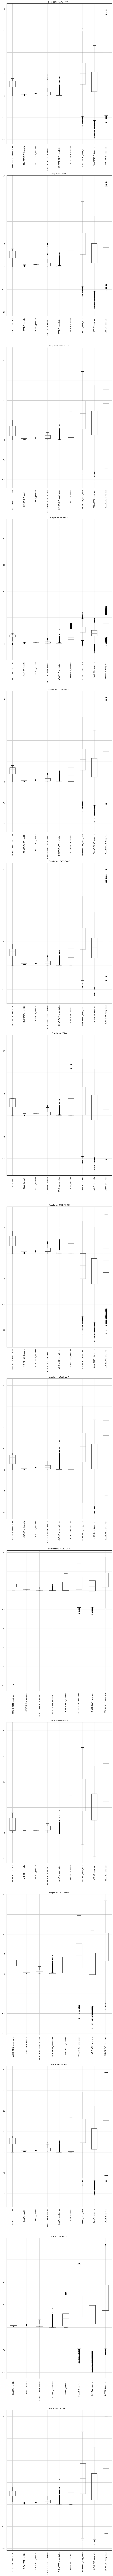

In [99]:
#cCREATING BOXPLOT FOR EACH CITY

fig, axes = plt.subplots(nrows=len(cities), ncols=1, figsize=(10, 15 * len(cities)))

# Iterate over each city
for i, city in enumerate(cities):
    # Filter columns based on the city name
    city_columns = [col for col in df.columns if city in col]
    
    # Filter the DataFrame to keep only numeric columns
    numeric_df = df[city_columns].select_dtypes(include='number')
    
    # Boxplot for the selected columns
    numeric_df.boxplot(ax=axes[i])
    
    # Set title for the subplot
    axes[i].set_title(f'Boxplot for {city}')
    
    # Rotate x-axis labels vertically
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [100]:
#HANDLING THE OUTLIERS
#if count of outliers is less than 5% from total count --> the outliers will be replaces with mean

for col in df.columns:
    # Calculate the z-scores for each value in the column
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    
    # Identify outliers (z-scores beyond 3 standard deviations)
    outliers = abs(z_scores) > 3
    
    # Check if the count of outliers is less than 5% of value counts
    if outliers.sum() < 0.05 * df[col].value_counts().sum():
        # Replace outliers with the mean of the column
        df[col][outliers] = df[col].mean()

# Display the modified DataFrame
print(df)

C:\Users\I512579\AppData\Local\Temp\ipykernel_20996\4259739375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = df[col].mean()
C:\Users\I512579\AppData\Local\Temp\ipykernel_20996\4259739375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = df[col].mean()
C:\Users\I512579\AppData\Local\Temp\ipykernel_20996\4259739375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = d

In [101]:
df.to_excel('cleaned_weather_data1.xlsx', index = False)

## Identifying high correlated columns in the dataframe

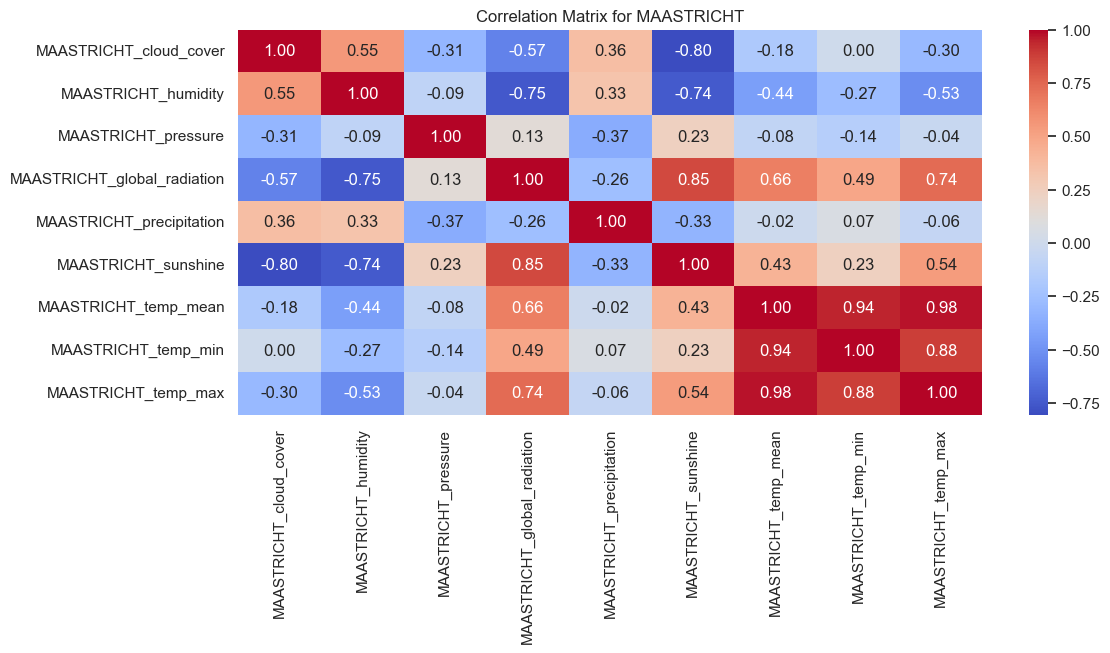

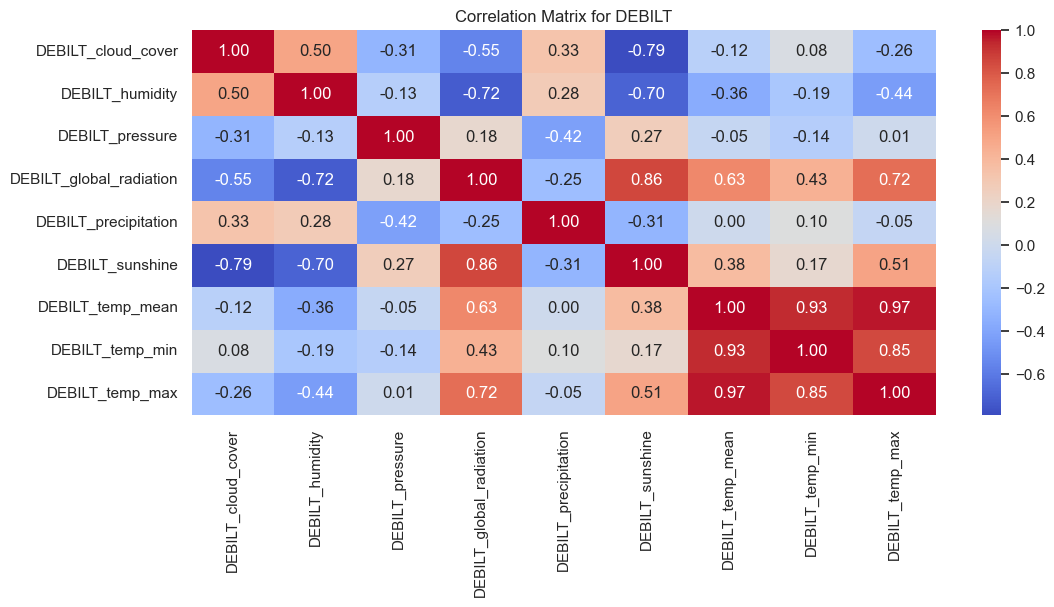

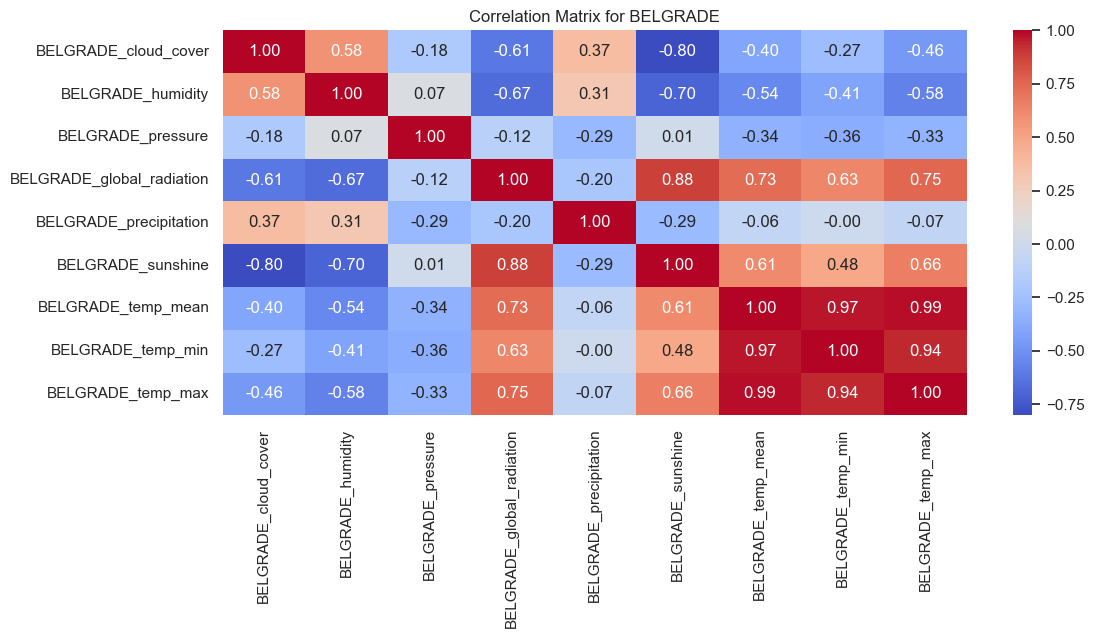

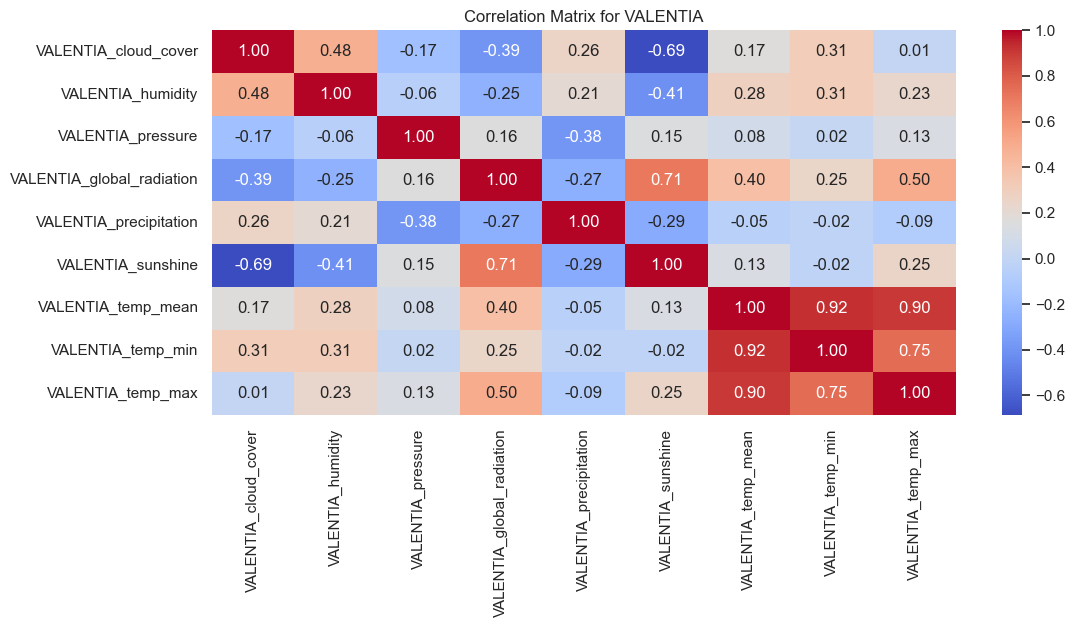

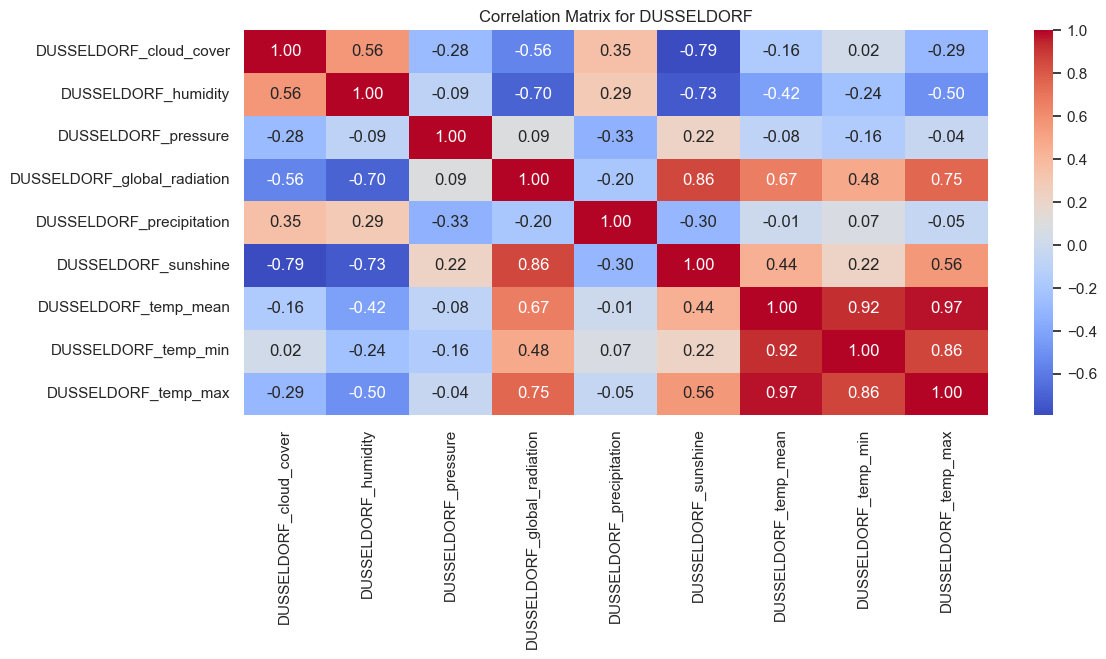

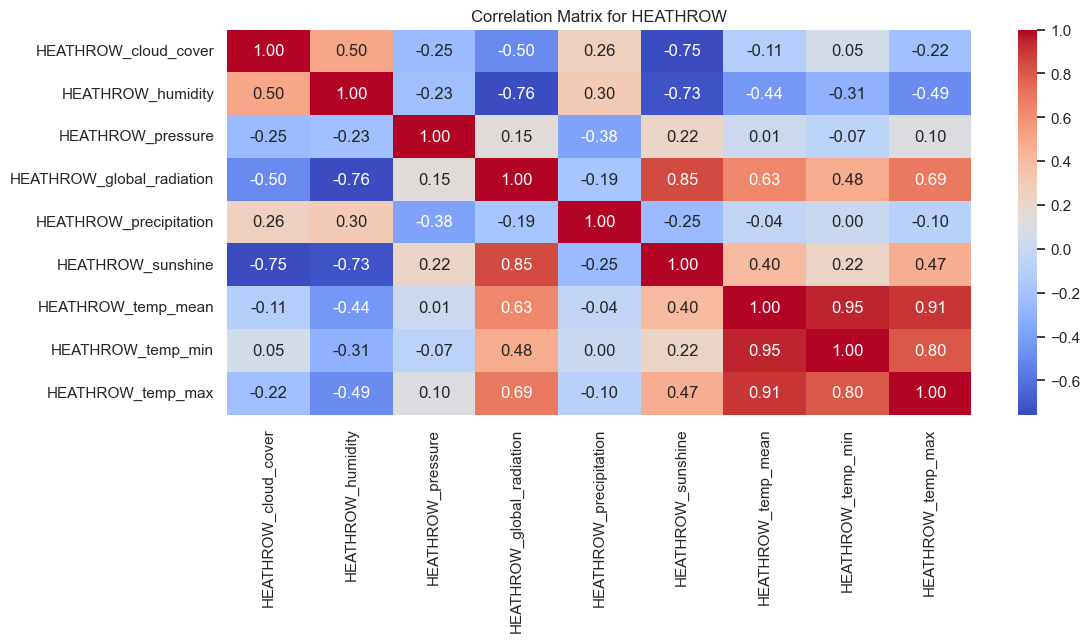

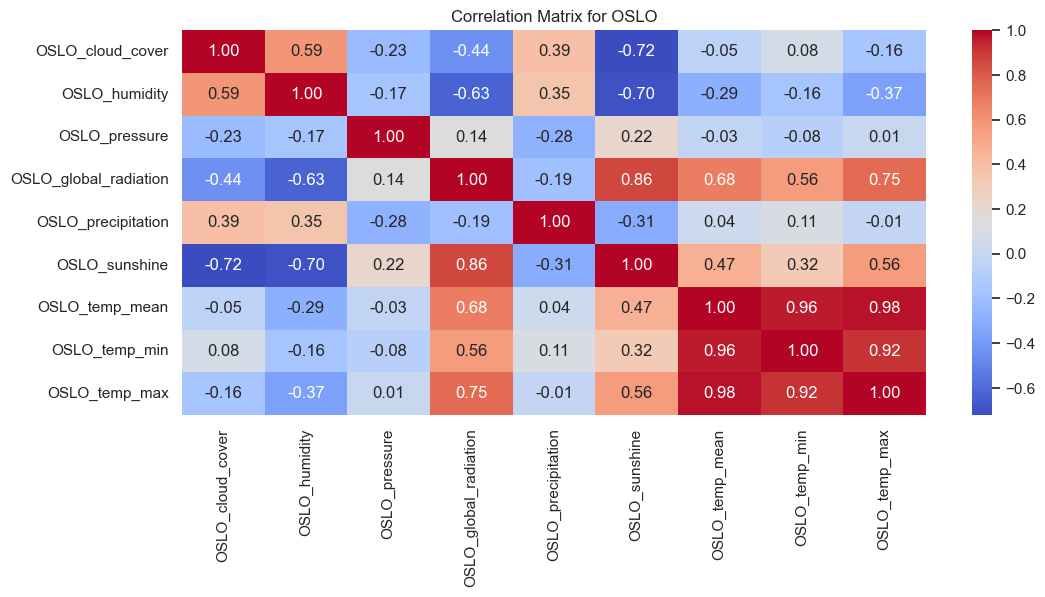

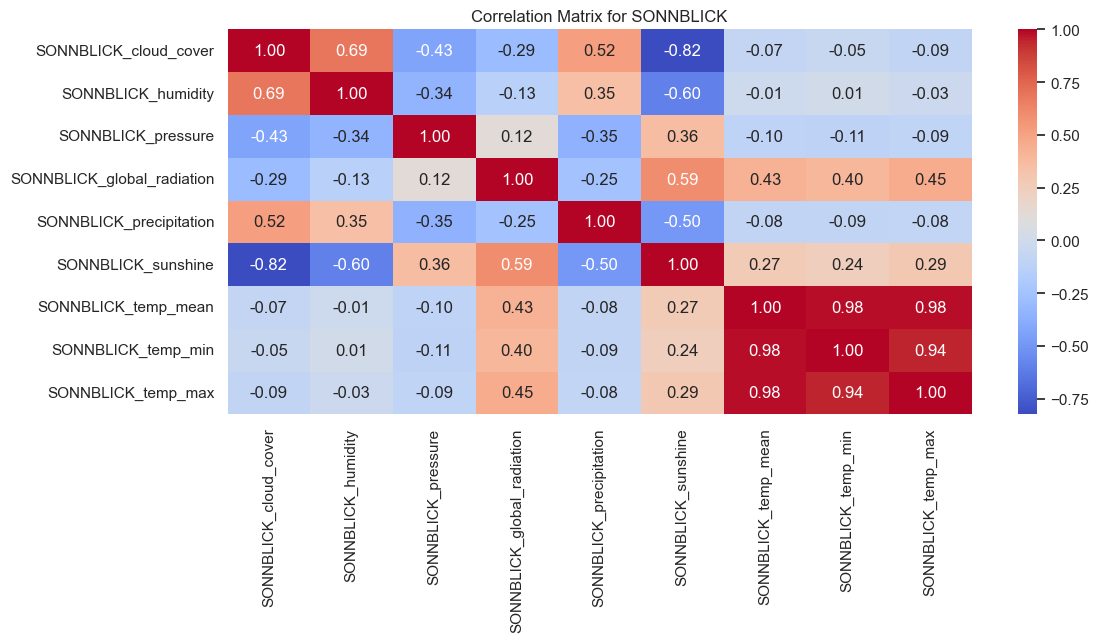

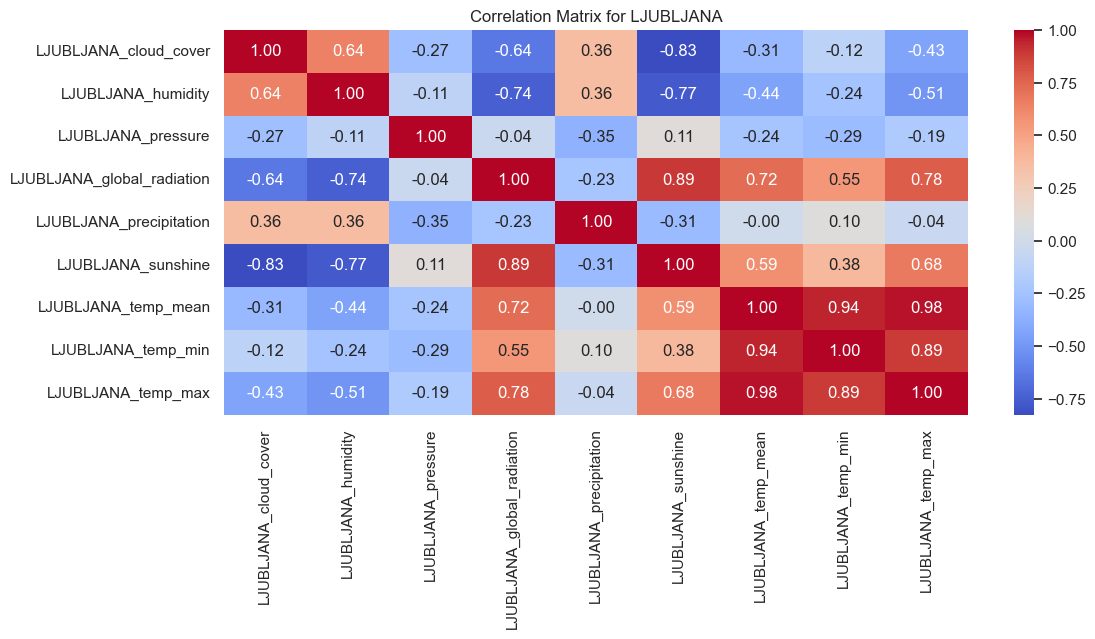

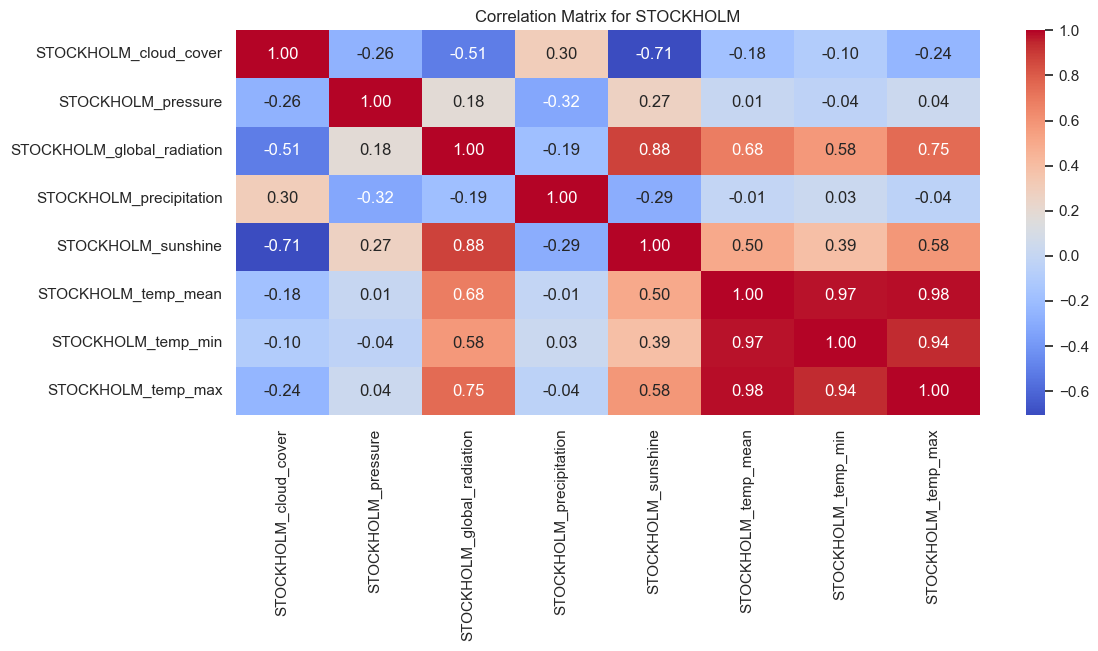

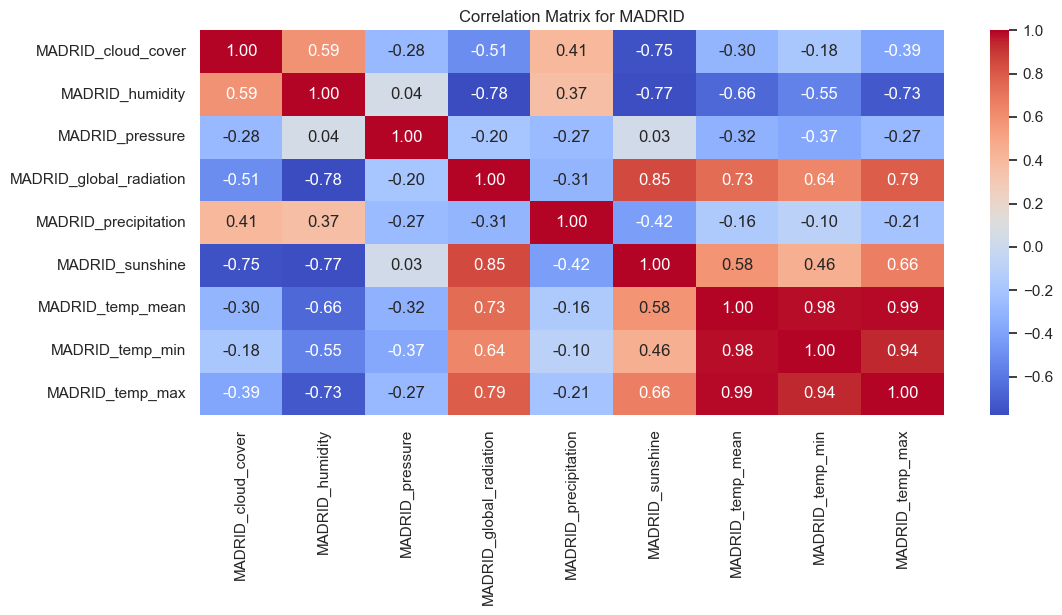

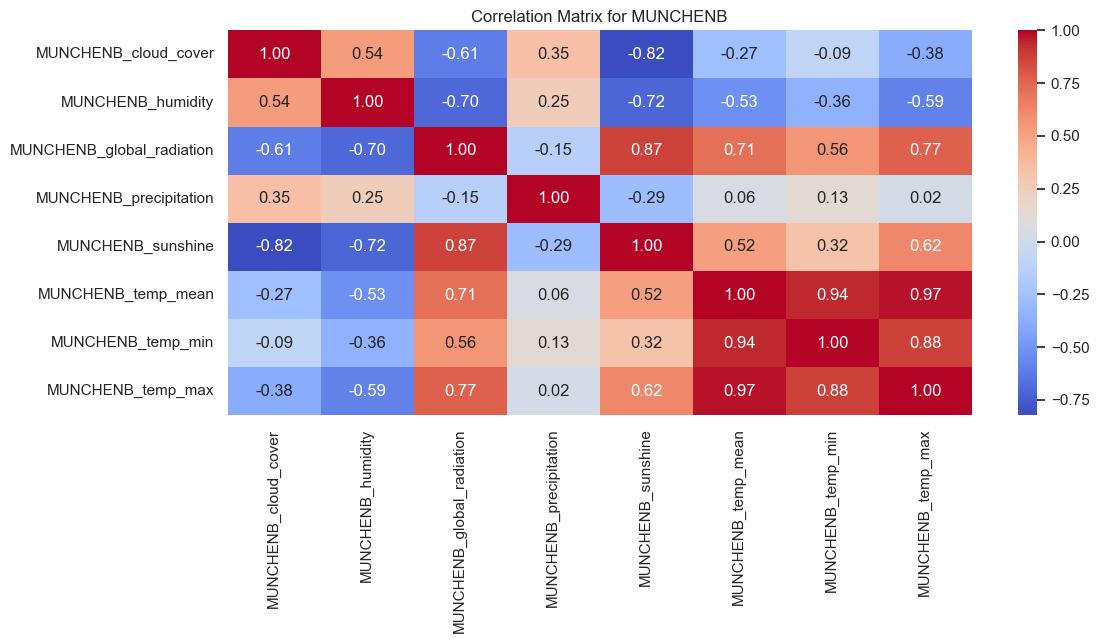

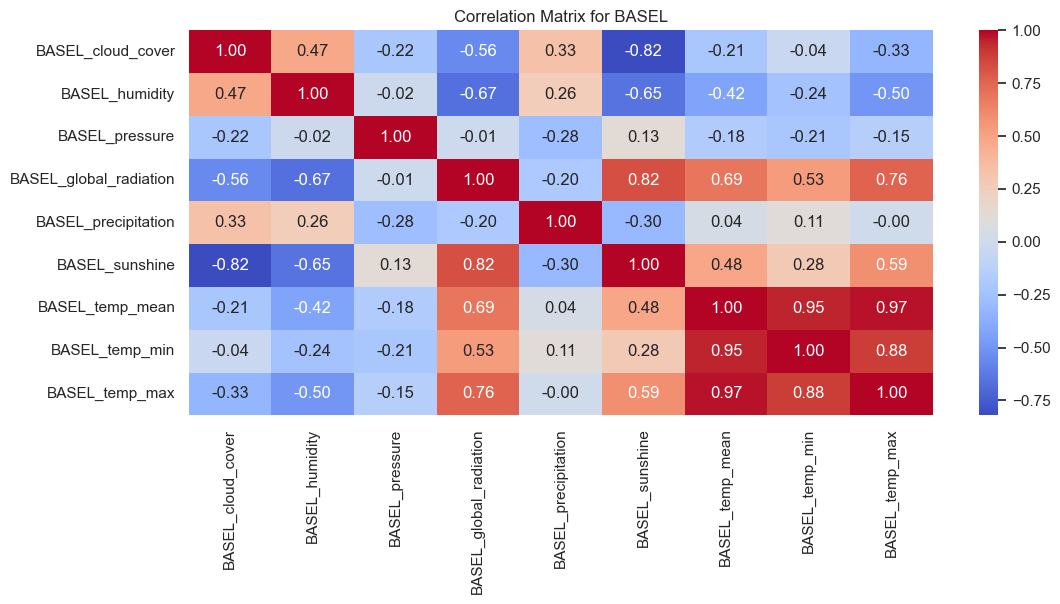

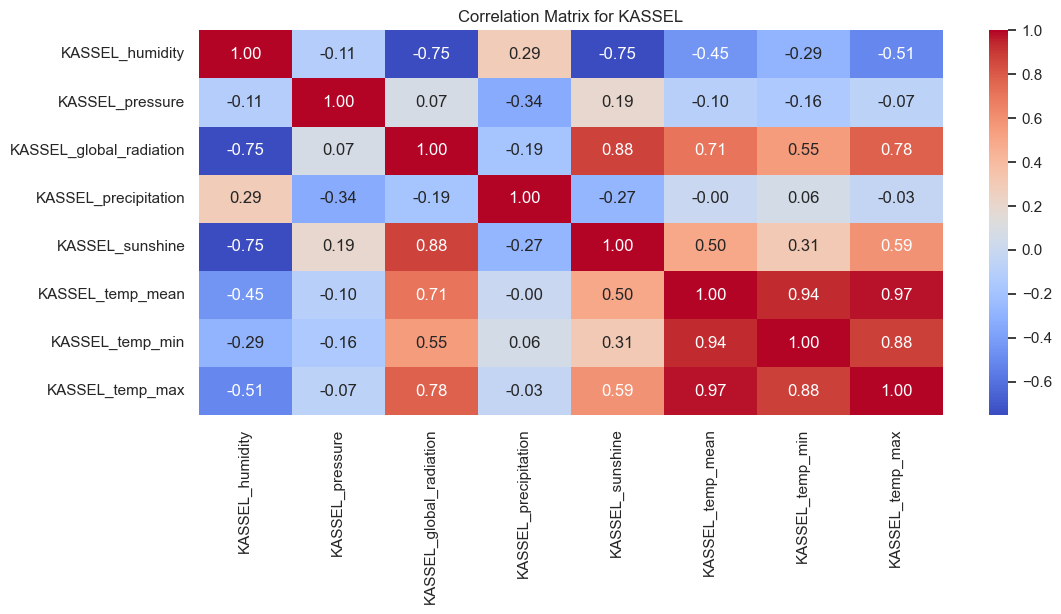

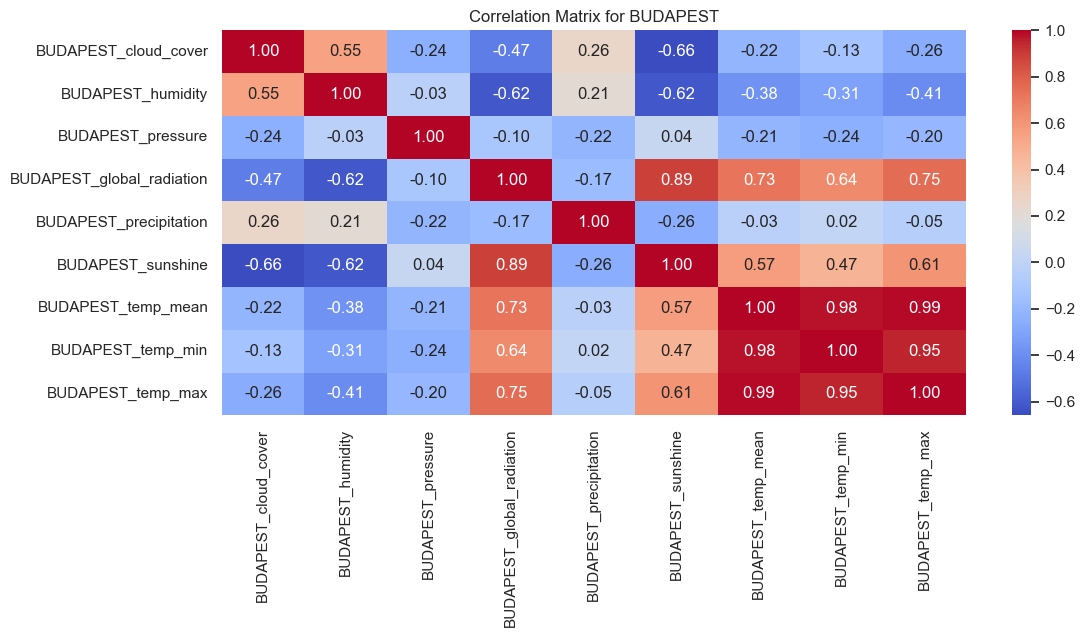

In [103]:
#CREATING CORRELATION MATRIXES FOR EACH CITY

# Create a dictionary to store correlation matrices for each city
correlation_matrices = {}

# Set the style of seaborn
sns.set(style="white")

# Iterate over each city
for city in cities:
    # Filter columns based on the city name
    city_columns = [col for col in df.columns if city in col]
    
    # Create a DataFrame with columns for the current city
    city_df = df[city_columns]
    
    # Calculate the correlation matrix for the city
    correlation_matrix = city_df.corr()
    
    # Store the correlation matrix in the dictionary
    correlation_matrices[city] = correlation_matrix
    
    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(12, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {city}')
    plt.show()

.

We can see that columns' pairs like Sunshine and Radiation, Temp_mean and Team_max, Temp_mean and Temp_min, Cloud_couver and Sunshine are highly correlated. This can influence our ANN model accurracy. Therefore I will drop columns containing following parameters:
* Cloud_cover
* Global radiation
* Temp min
* Temp max

In [39]:
#Creating a list of parameters which we want to drop:
parameters_to_drop = ['temp_min', 'temp_max', 'global_radiation', 'cloud_cover']


In [40]:
#Dropping columns which contain parameters we want to drop

for param in parameters_to_drop:
    if param:
        cols_to_drop = [col for col in df.columns if param.lower() in col.lower()]
        df = df.drop(cols_to_drop, axis=1)

In [41]:
df.head()

BASEL_humidity  BASEL_pressure  BASEL_precipitation  BASEL_sunshine  \
0            0.85           1.018                 0.09             0.7   
1            0.84           1.018                 1.05             1.1   
2            0.90           1.018                 0.30             0.0   
3            0.92           1.018                 0.00             4.1   
4            0.95           1.018                 0.14             5.4   

   BASEL_temp_mean  BELGRADE_humidity  BELGRADE_pressure  \
0              6.5               0.81             1.0195   
1              6.1               0.84             1.0172   
2              8.5               0.77             1.0179   
3              6.3               0.93             1.0268   
4              3.0               0.99             1.0286   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_precipitation  \
0               0.67              1.017                    0.01   
1               0.67              1.017                    0.31   
2               0.67              1.017                    0.00   
3               0.67              1.017                    0.00   
4               0.67              1.017                    0.00   

   BUDAPEST_sunshine  BUDAPEST_temp_mean  DEBILT_humidity  DEBILT_pressure  \
0                2.3                 2.4             0.85           1.0032   
1                0.0                 2.3             0.90           1.0056   
2                0.6                 2.7             0.92           1.0165   
3                0.0                 2.0             0.95           1.0265   
4                0.0                 2.5             0.90           1.0243   

   DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
0                  0.25              0.0               9.3   
1                  0.06              0.1               7.7   
2                  0.01              3.0               6.8   
3                  0.09              0.0               6.7   
4                  0.39              0.0               8.0   

   DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_precipitation  \
0                 0.83               1.0161                      0.08   
1                 0.89               1.0161                      0.66   
2                 0.95               1.0161                      0.07   
3                 0.86               1.0161                      0.02   
4                 0.92               1.0161                      0.62   

   DUSSELDORF_sunshine  DUSSELDORF_temp_mean  HEATHROW_humidity  \
0                  0.0                  10.0               0.91   
1                  0.5                   8.2               0.98   
2                  0.0                   7.1               0.96   
3                  0.0                   6.8               0.98   
4                  0.0                   7.7               0.84   

   HEATHROW_pressure  HEATHROW_precipitation  HEATHROW_sunshine  \
0             1.0010                    0.22                0.0   
1             1.0051                    0.23                0.0   
2             1.0166                    0.07                0.1   
3             1.0230                    0.00                0.0   
4             1.0275                    0.00                2.1   

   HEATHROW_temp_mean  KASSEL_humidity  KASSEL_pressure  KASSEL_precipitation  \
0                10.6             0.82           1.0094                  0.48   
1                 6.1             0.86           1.0086                  0.27   
2                 8.4             0.91           1.0129

In [42]:
df.shape

(22950, 73)

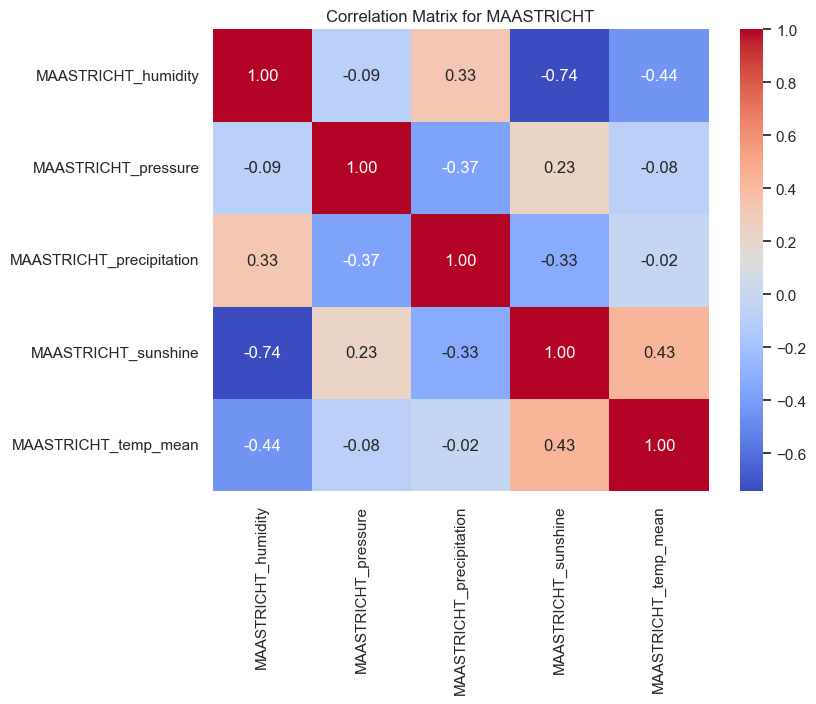

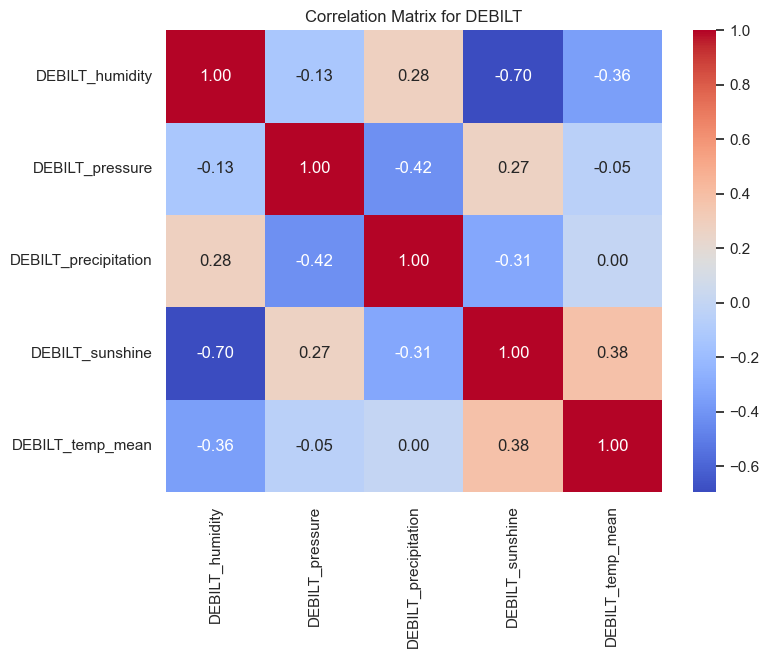

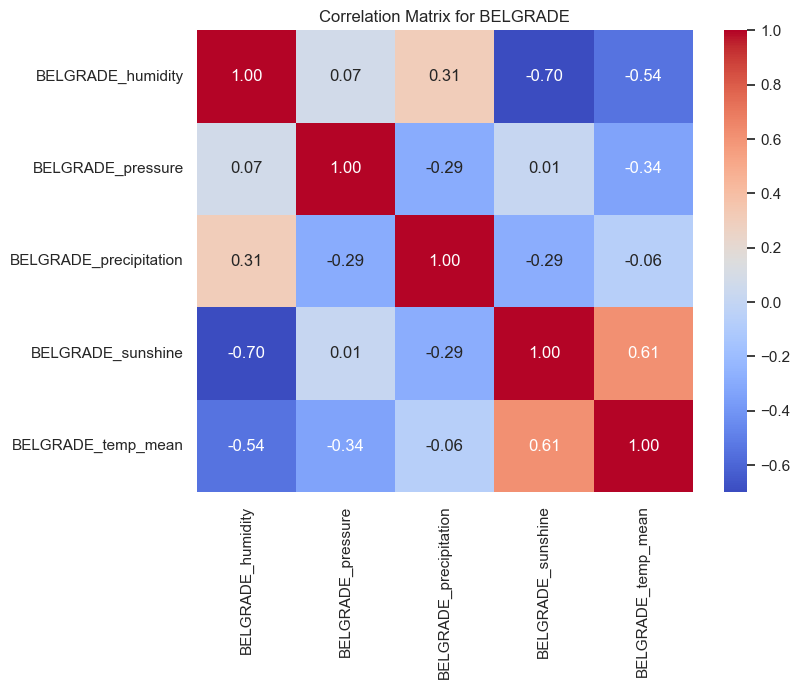

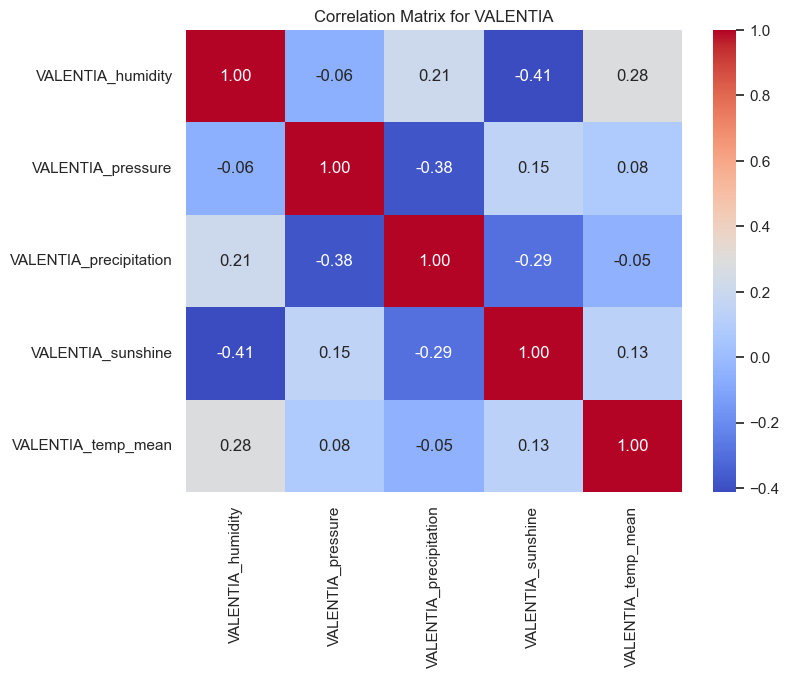

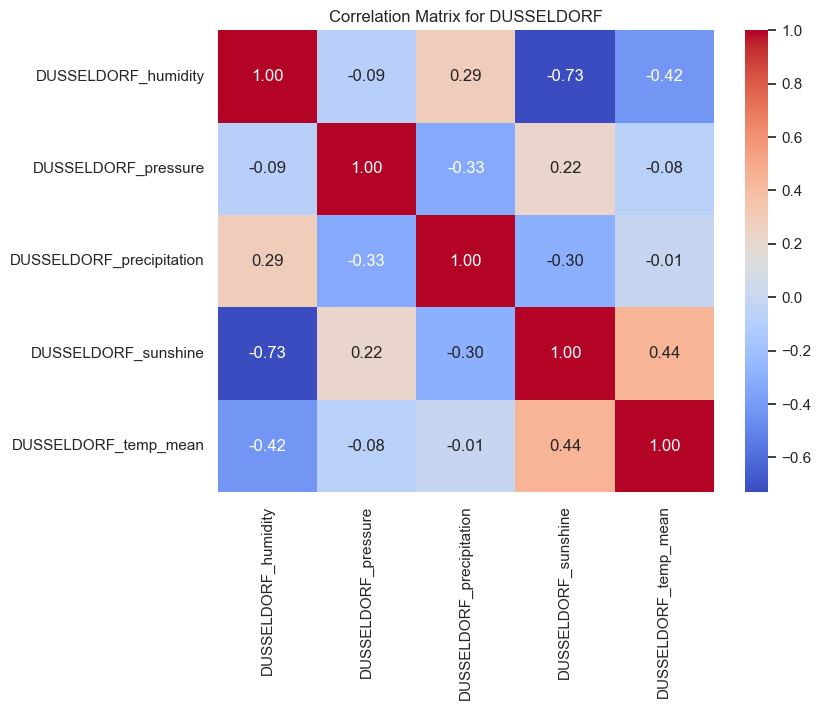

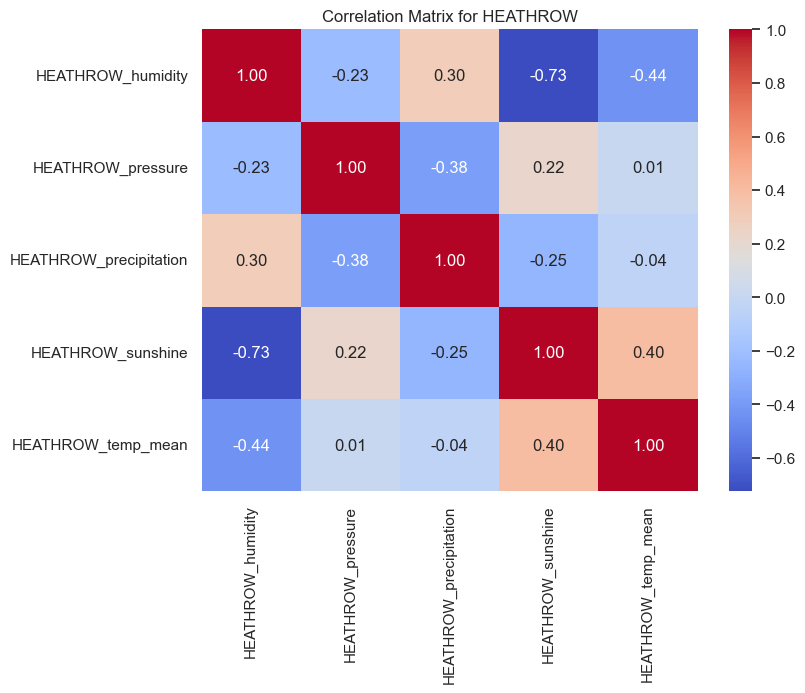

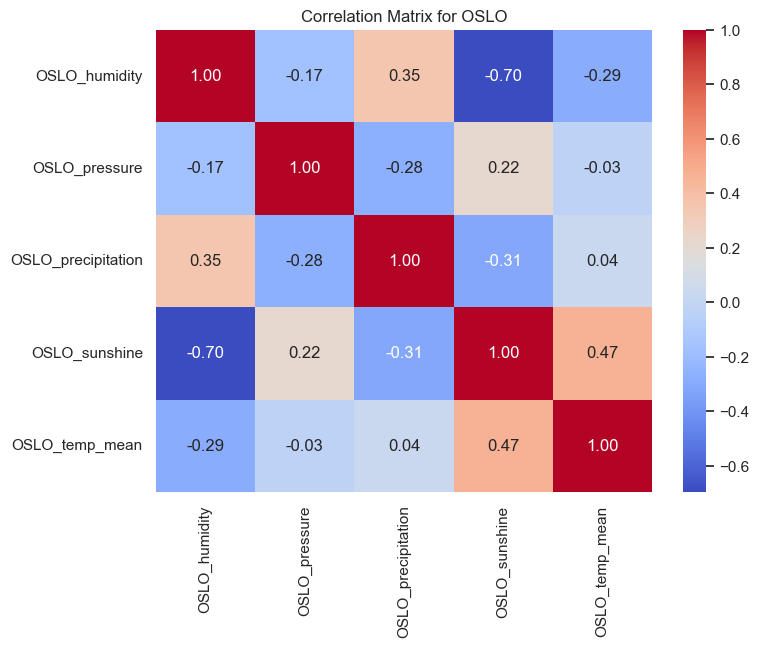

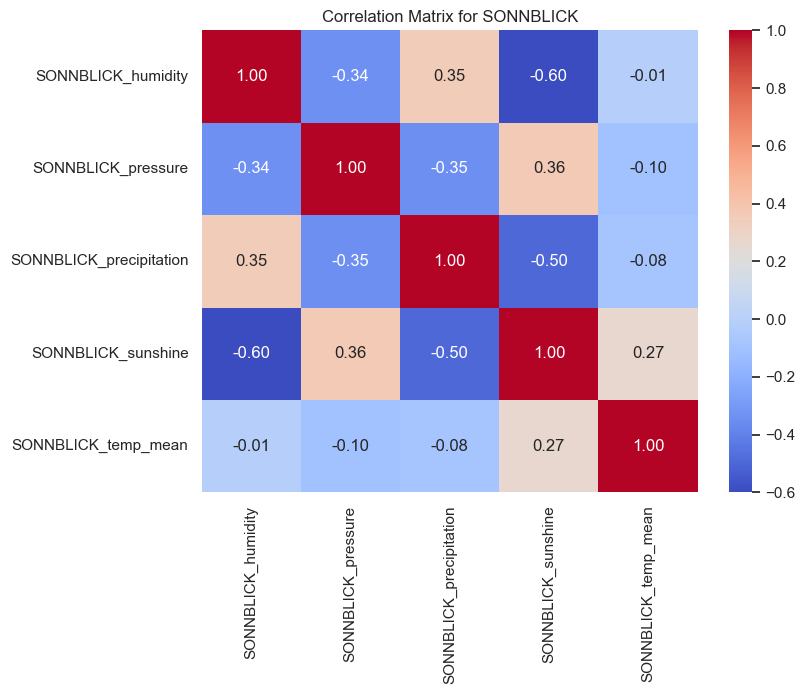

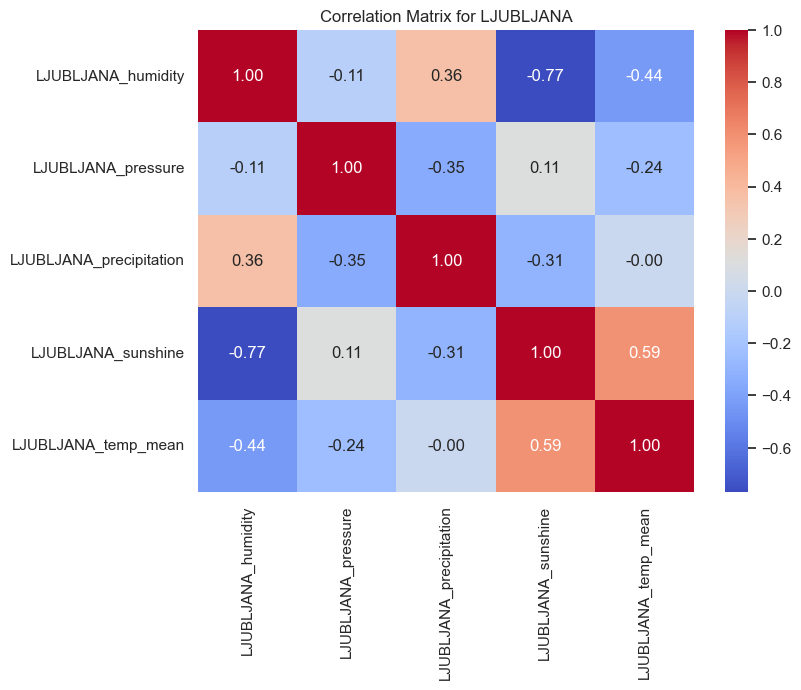

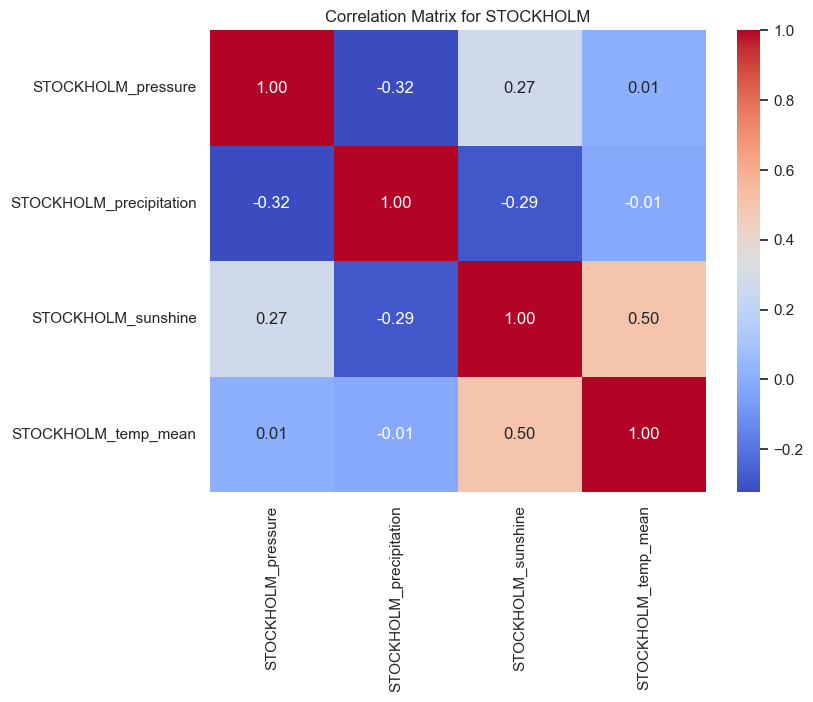

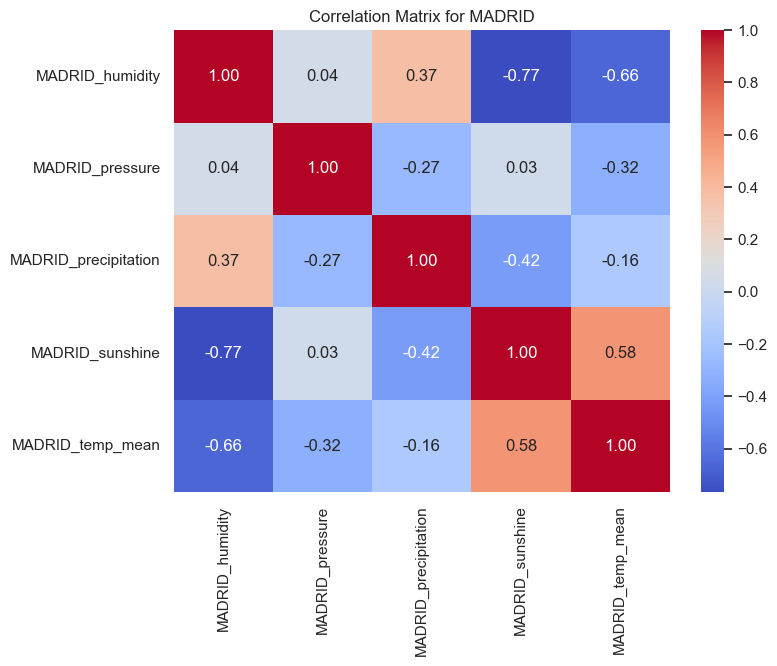

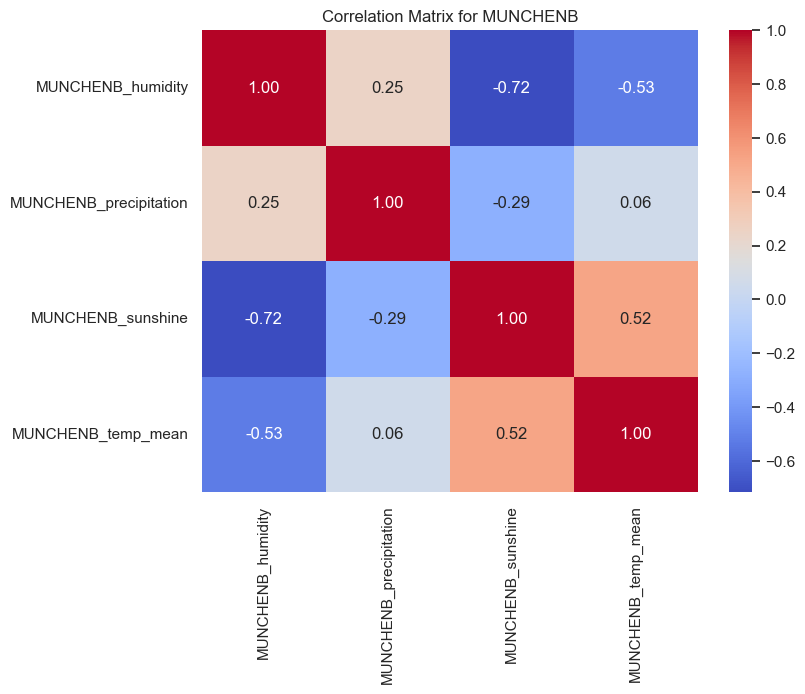

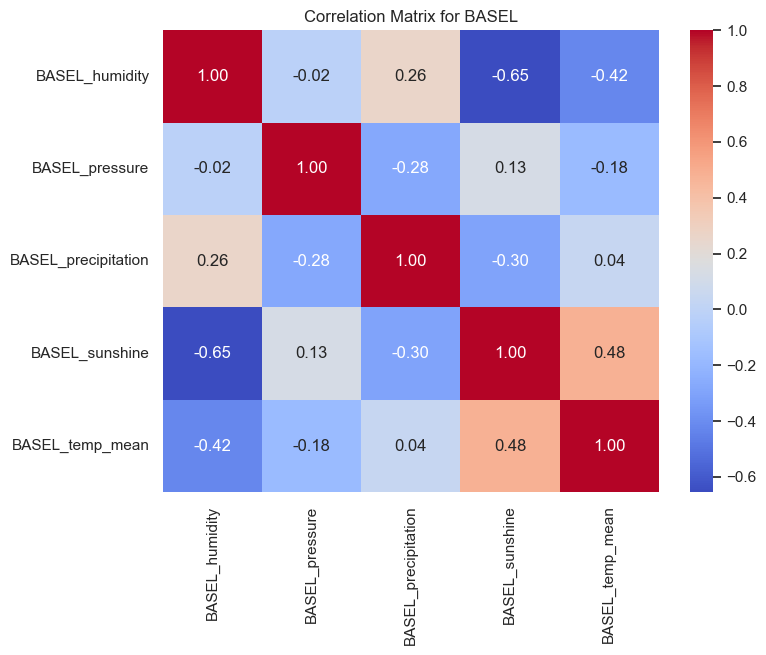

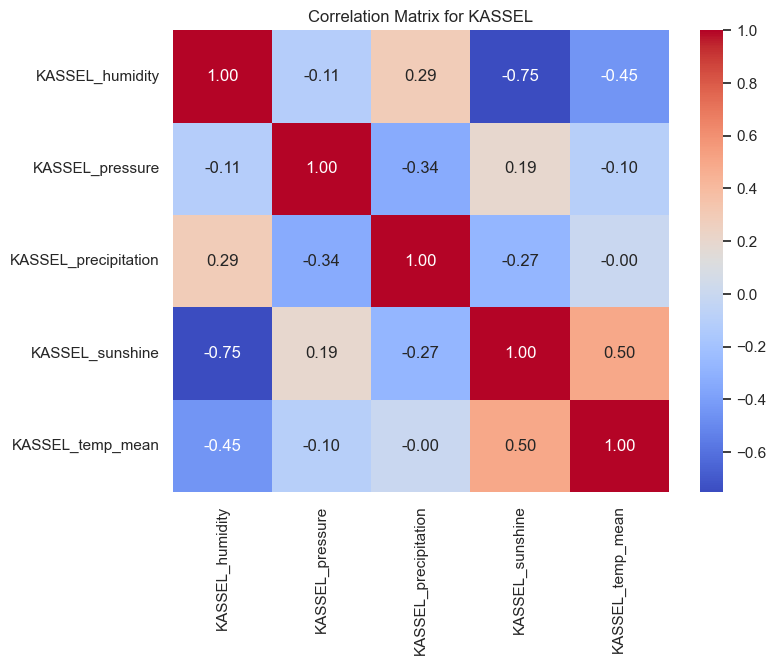

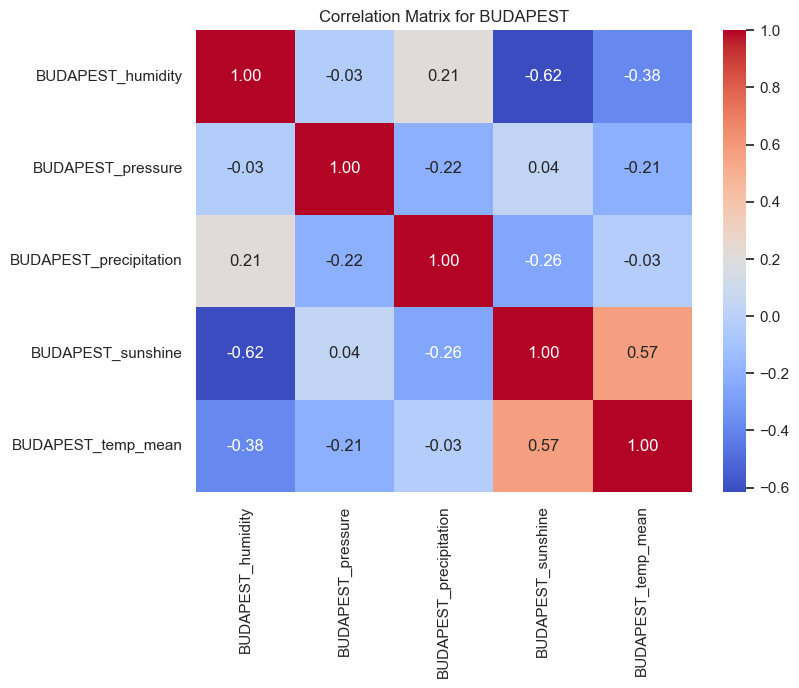

In [43]:
#CREATING CORRELATION MATRIXES ON A NEW DATASET

# Create a dictionary to store correlation matrices for each city
correlation_matrices = {}

# Set the style of seaborn
sns.set(style="white")

# Iterate over each city
for city in cities:
    # Filter columns based on the city name
    city_columns = [col for col in df.columns if city in col]
    
    # Create a DataFrame with columns for the current city
    city_df = df[city_columns]
    
    # Calculate the correlation matrix for the city
    correlation_matrix = city_df.corr()
    
    # Store the correlation matrix in the dictionary
    correlation_matrices[city] = correlation_matrix
    
    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {city}')
    plt.show()

In [44]:
df.to_excel('cleaned_weather_data2.xlsx', index = False)

In [45]:
cities

['MAASTRICHT',
 'DEBILT',
 'BELGRADE',
 'VALENTIA',
 'DUSSELDORF',
 'HEATHROW',
 'OSLO',
 'SONNBLICK',
 'LJUBLJANA',
 'STOCKHOLM',
 'MADRID',
 'MUNCHENB',
 'BASEL',
 'KASSEL',
 'BUDAPEST']